# Self-study try-it activity 23.2: Kernel PCA

Kernel PCA is an advanced form of PCA that helps uncover complex, non-linear patterns in data. Unlike standard PCA, which works in the original feature space, kernel PCA uses a kernel function (such as polynomial or radial basis function) to indirectly map the data into a higher-dimensional space. This approach, known as the kernel trick, allows the algorithm to capture curved or layered structures without explicitly performing the transformation. Kernel PCA can effectively reduce dimensionality even when linear methods fall short, by analysing the resulting kernel matrix.

Below is the same data set on stocks over five years, plotted using the linear kernel, along with three new non-linear kernels built into scikit-learn. Note the significant differences in the first two components of the PCA projections that are now calculated.

With this type of analysis, it may not always be clear which kernel to use – usually, evaluating the performance of the method you attempt is the most crucial consideration. Knowing about the different possible kernels for PCA is an important additional tool that can be leveraged to solve problems that cannot be tackled otherwise.

In [ ]:
#Import the necessary libraries
import numpy.random as rand
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In this notebook, you initially work with a data set comprising S&P 500 stock prices over the past five years.

In [2]:
df = pd.read_csv("data/all_stocks_5yr.csv")

names = df["Name"].unique()
range(len(df[ df["Name"] == names[0]]["close"]))
l = len(df[ df["Name"] == names[0]]["close"])
data = pd.DataFrame(index = range(l), columns= names)

for name in names:
    x = df[ df["Name"] == name]["close"]
    if x.isnull().any() or len(x) != l:
        data = data.drop(columns= name)
    else:
        data[name] = np.array(x)

data.head()


,AAL,AAPL,AAP,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,...,XLNX,XL,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
0,14.75,67.8542,78.90,36.25,46.89,34.41,73.31,39.12,45.70,30.22,...,37.51,28.24,88.61,42.87,31.84,27.09,65.30,75.85,24.14,33.05
1,14.46,68.5614,78.39,35.85,46.76,34.26,73.07,38.64,46.08,30.28,...,37.46,28.31,88.28,42.84,31.96,27.46,64.55,75.65,24.21,33.26
2,14.27,66.8428,78.60,35.42,46.96,34.30,73.37,38.89,46.27,30.81,...,37.58,28.41,88.46,42.87,31.84,27.95,64.75,75.44,24.49,33.74
3,14.66,66.7156,78.97,35.27,46.64,34.46,73.56,38.81,46.26,31.16,...,37.80,28.42,88.67,43.08,32.00,28.26,64.41,76.00,24.74,33.55
4,13.99,66.6556,78.84,36.57,46.77,34.70,73.13,38.61,46.54,31.40,...,38.44,28.22,88.52,42.91,32.12,28.47,63.89,76.34,24.63,33.27


Then the data set is standardised using `StandardScaler()`, which performs two key steps:

- Fitting the scaler – computes the mean and standard deviation for each feature in the data set

- Transforming the data – rescales each feature so that it has a mean of zero and a standard deviation of one

Standardisation ensures that all features are on the same scale, which helps many machine learning models perform more effectively.

## To-do 1:
- Use `StandardScaler()` to fit the data and assign the result to scaler.

- Then, use `scaler.transform(data)` and assign the output to `data_scaled`.


In [ ]:
#Answer
scaler = StandardScaler().fit(data)
data_scaled = scaler.transform(data)

Kernel PCA is applied using four different kernels to reduce dimensionality and visualise the transformed data.

Kernel PCA is initialised with ten components using four kernels: linear, RBF, polynomial and cosine.

Each kernel-specific kernel PCA object fits and transforms the scaled data using `fit_transform()`.

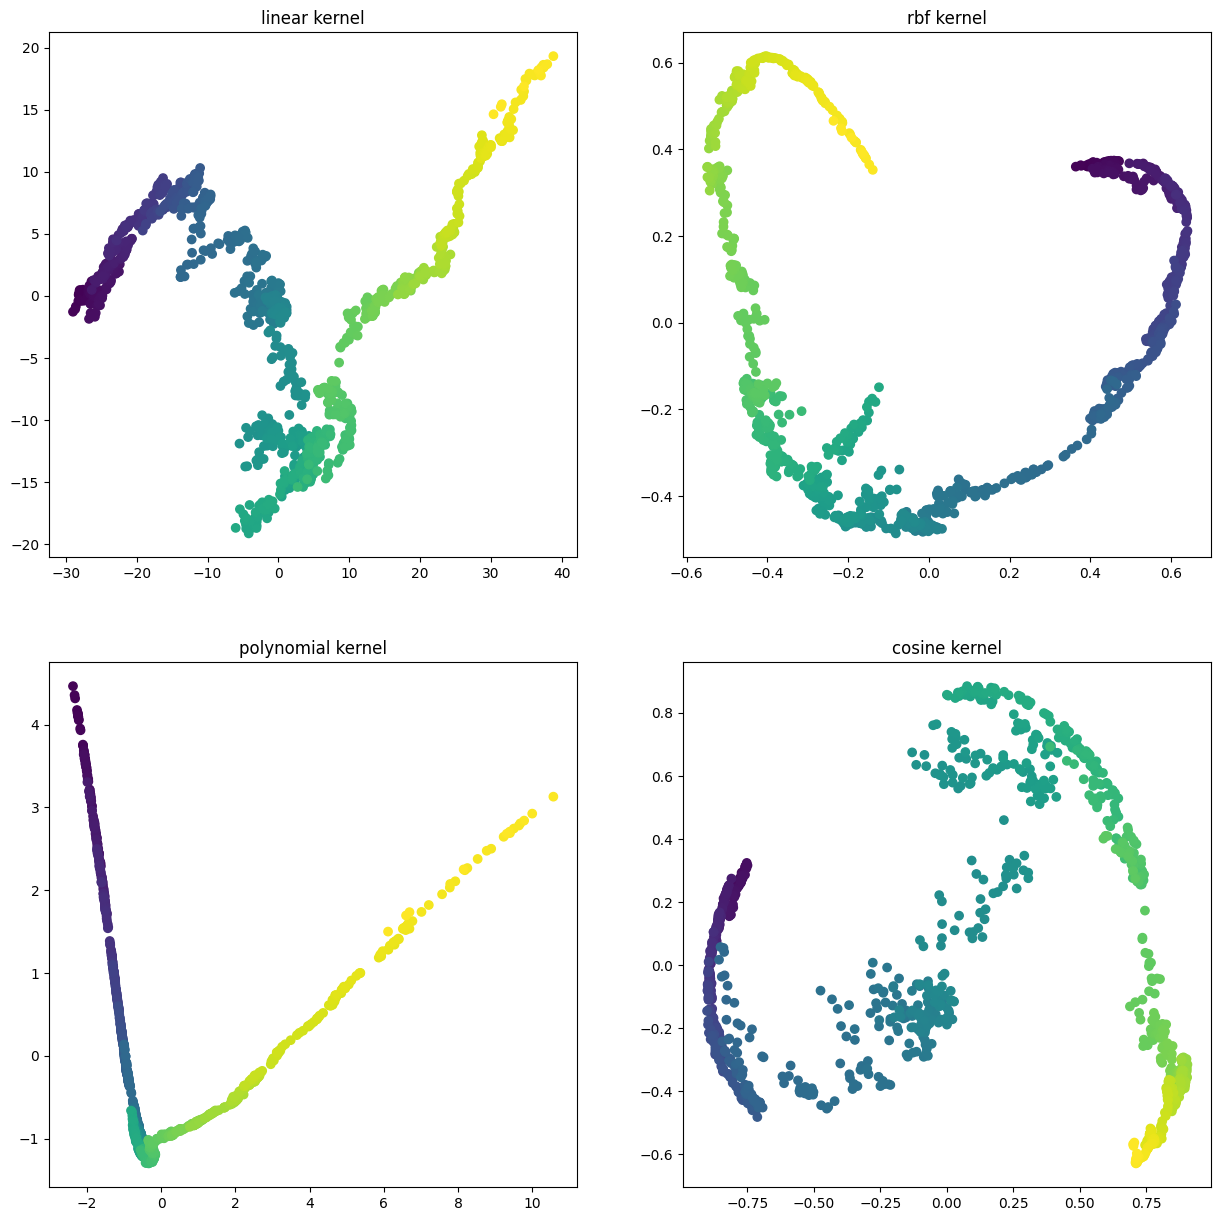

In [4]:
from sklearn.decomposition import KernelPCA

kpca_linear = KernelPCA(n_components = 10, kernel = "linear")
kpca_rbf = KernelPCA(n_components = 10, kernel = "rbf")
kpca_poly = KernelPCA(n_components= 10, kernel= "poly")
kpca_cos = KernelPCA(n_components= 10, kernel= "cosine")

X_linear = kpca_linear.fit_transform(data_scaled)
X_rbf = kpca_rbf.fit_transform(data_scaled)
X_poly = kpca_poly.fit_transform(data_scaled)
X_cos = kpca_cos.fit_transform(data_scaled)


fig, axs = plt.subplots(2,2, figsize = (15, 15))
axs[0, 0].scatter(X_linear[:,0],X_linear[:, 1], c = np.arange(l)/l)
axs[0, 0].set_title("linear kernel")
axs[0, 1].scatter(X_rbf[:, 0], X_rbf[:, 1], c = np.arange(l)/l)
axs[0, 1].set_title("rbf kernel")
axs[1, 0].scatter(X_poly[:,0],X_poly[:, 1], c = np.arange(l)/l)
axs[1, 0].set_title("polynomial kernel")
axs[1, 1].scatter(X_cos[:,0],X_cos[:, 1], c = np.arange(l)/l)
axs[1, 1].set_title("cosine kernel")
plt.show()

The data set below is a well-known benchmark in machine learning, containing measurements of various biological features across different iris species.

Using the dimensionality reduction techniques introduced in this module-PCA and kernel PCA - analyse which method most effectively separates the iris species based solely on sepal and petal measurements.

In [5]:
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(data= iris['data'],
                     columns= iris['feature_names'])

print(iris_df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


## To-do 2:

- Perform `kpca_linear.fit_transform(iris_df)` and store the output in `X_linear`.
- Similarly, perform the RBF, poly and cos `fit_transorms` and store their outputs in `X_rbf`, `X_poly` and `X_cos`, respectively.

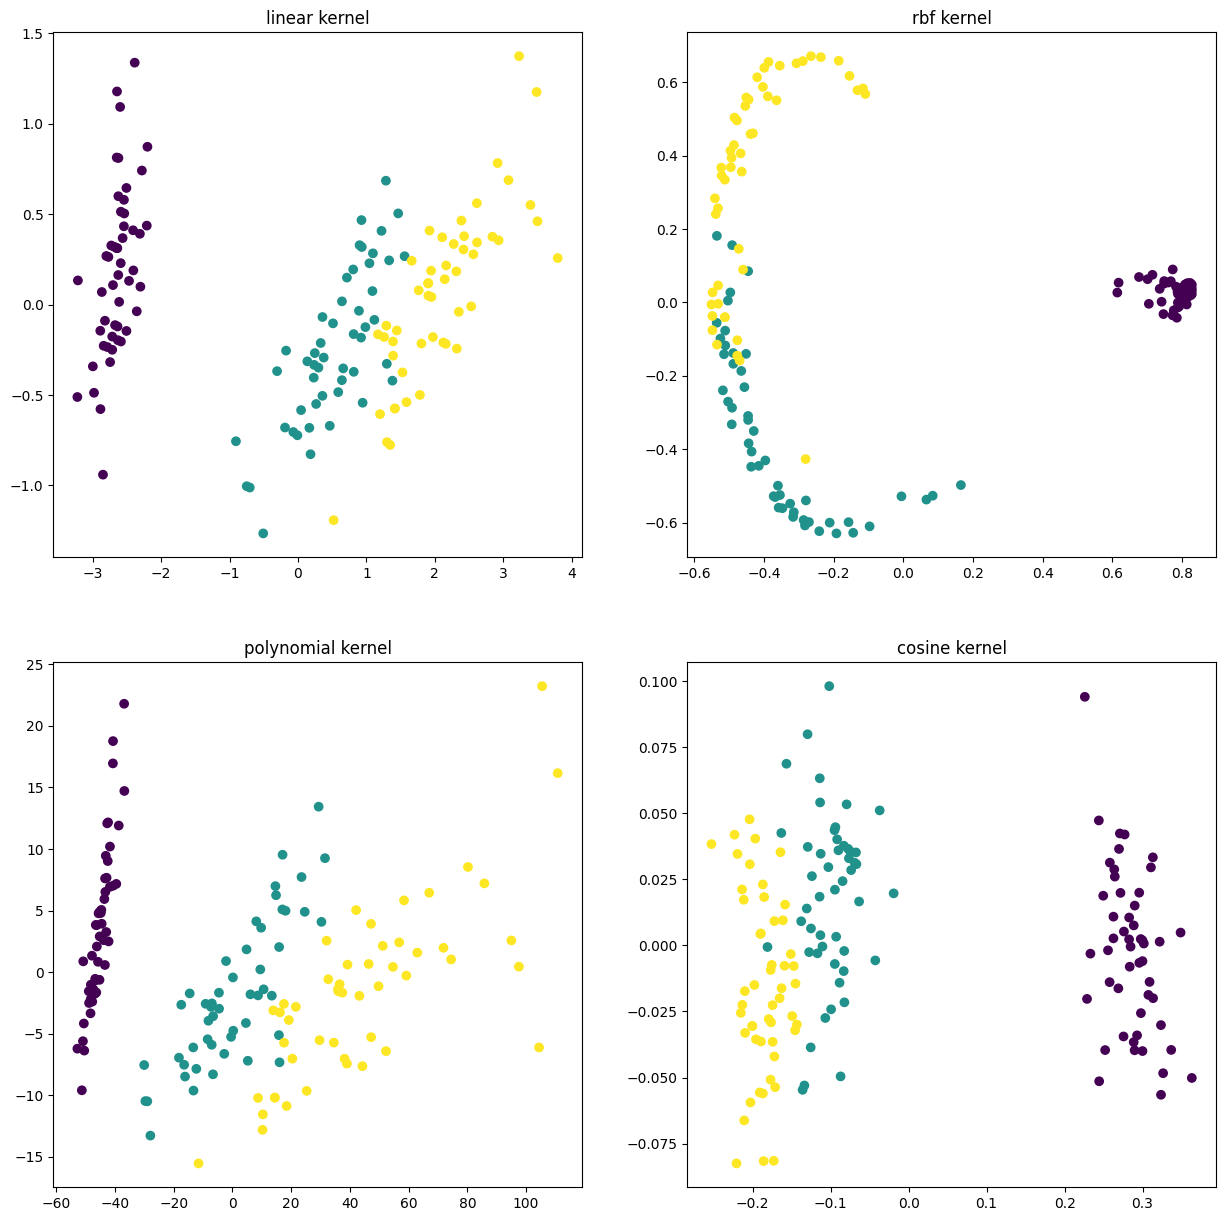

In [ ]:
#Answer
X_linear = kpca_linear.fit_transform(iris_df)
X_rbf = kpca_rbf.fit_transform(iris_df)
X_poly = kpca_poly.fit_transform(iris_df)
X_cos = kpca_cos.fit_transform(iris_df)

fig, axs = plt.subplots(2,2, figsize = (15, 15))
axs[0, 0].scatter(X_linear[:,0],X_linear[:, 1], c = iris["target"])
axs[0, 0].set_title("linear kernel")
axs[0, 1].scatter(X_rbf[:, 0], X_rbf[:, 1], c = iris["target"])
axs[0, 1].set_title("rbf kernel")
axs[1, 0].scatter(X_poly[:,0],X_poly[:,1], c = iris["target"])
axs[1, 0].set_title("polynomial kernel")
axs[1, 1].scatter(X_cos[:,0],X_cos[:,1], c = iris["target"])
axs[1, 1].set_title("cosine kernel")
plt.show()


## To-do 3:

- Use `StandardScaler()` to fit the data and assign the result to `scaler`.

- Then, use `scaler.transform(iris_df)` and assign the output to `iris_scaled`.

In [ ]:
#Answer
scaler = StandardScaler().fit(iris_df)

iris_scaled = scaler.transform(iris_df)

## To-do 4:
- Perform `kpca_linear.fit_transform(iris_scaled)` and store it in `X_linear_scaled`.
- Similarly, perform the RBF, poly and cos `fit_tranforms` and store their outputs in `X_rbf_scaled`, `X_poly_scaled` and `X_cos_scaled`, respectively.

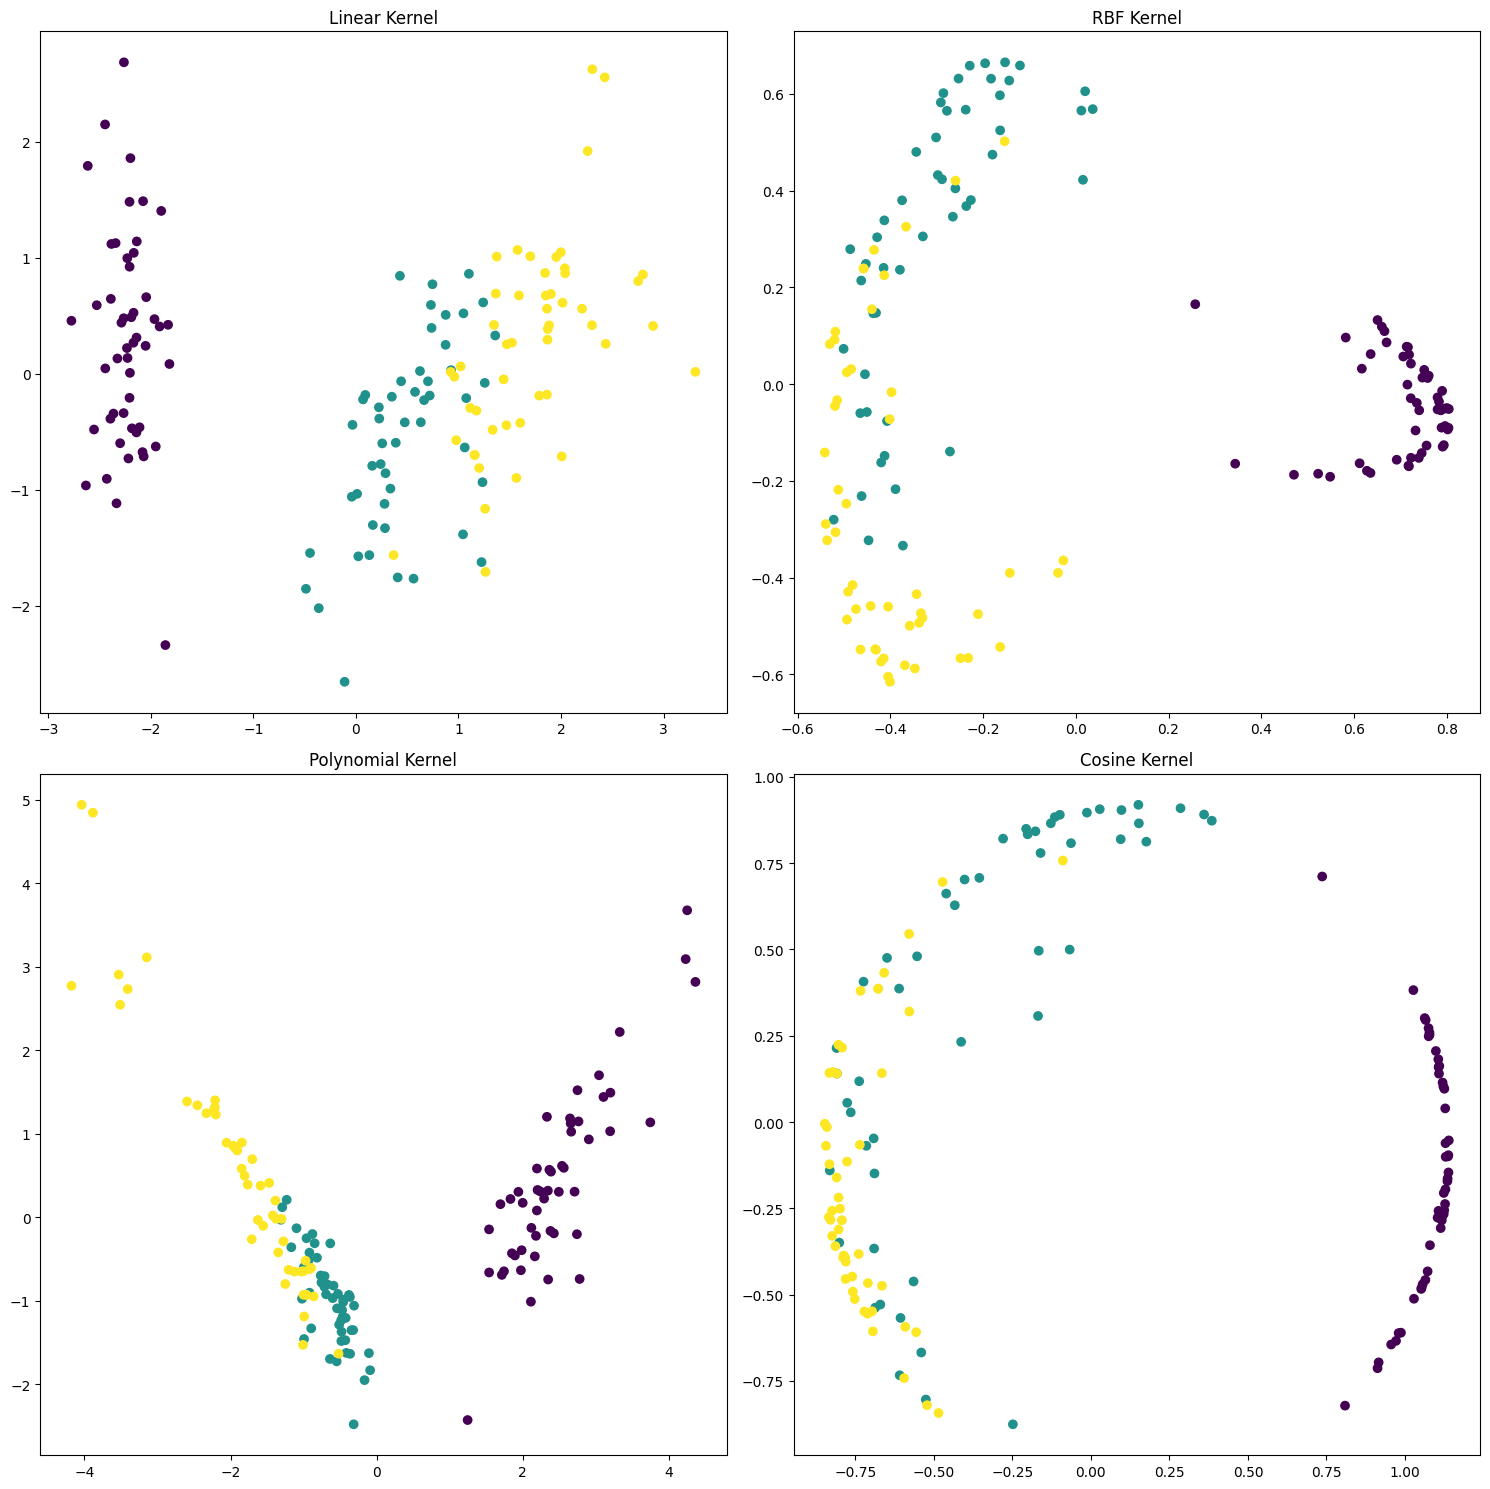

In [ ]:
#Answer

X_linear_scaled = kpca_linear.fit_transform(iris_scaled)
X_rbf_scaled = kpca_rbf.fit_transform(iris_scaled)
X_poly_scaled = kpca_poly.fit_transform(iris_scaled)
X_cos_scaled = kpca_cos.fit_transform(iris_scaled)

fig, axs = plt.subplots(2,2, figsize = (15, 15))

axs[0, 0].scatter(X_linear_scaled[:, 0], X_linear_scaled[:, 1], c=iris["target"])

axs[0, 0].set_title("Linear Kernel")

axs[0, 1].scatter(X_rbf_scaled[:, 0], X_rbf_scaled[:, 1], c=iris["target"])

axs[0, 1].set_title("RBF Kernel")


axs[1, 0].scatter(X_poly_scaled[:, 0], X_poly_scaled[:, 1], c=iris["target"])

axs[1, 0].set_title("Polynomial Kernel")


axs[1, 1].scatter(X_cos_scaled[:, 0], X_cos_scaled[:, 1], c=iris["target"])

axs[1, 1].set_title("Cosine Kernel")


plt.tight_layout()

plt.show()



## To-do 5:
How does applying `StandardScaler` to the iris data set before kernel PCA affect the separation of species in the resulting visualisations, and which approach yields better results?

## Answer

Applying `StandardScaler` before kernel PCA significantly improves the separation of iris species in the transformed space. Without scaling, features such as petal length and width dominate due to their larger numeric ranges, which can distort the kernel matrix and reduce the effectiveness of dimensionality reduction.

After scaling, each feature contributes equally to the kernel matrix, enabling kernels such as RBF and polynomial to model non-linear class boundaries more accurately. The visualisations show clearer, more distinct clusters when `StandardScaler` is used – particularly with the RBF kernel, which reveals well-separated groups with minimal overlap.

Therefore, using `StandardScaler` before kernel PCA is the better approach, especially when features vary in scale, as it ensures fair contribution from all dimensions and enhances the interpretability of the projections.